In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables
print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean())/targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(397, 10)
(397,)
(45, 10)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(units = 128, activation = 'relu', input_shape = (train_data.shape[1], )),
        Dense(units = 64, activation = 'relu'), 
        Dense(units = 16, activation = 'relu'), 
        Dense(units = 1)
    ])
    return model

#define model
model = get_model()

In [7]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 10,721
Trainable params: 10,721
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])


In [9]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, validation_split = 0.15, 
                            batch_size = 64, verbose = 2)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 0.9673 - mae: 0.8467 - val_loss: 1.0552 - val_mae: 0.8525
Epoch 2/100
337/337 - 0s - loss: 0.9277 - mae: 0.8286 - val_loss: 1.0190 - val_mae: 0.8364
Epoch 3/100
337/337 - 0s - loss: 0.8774 - mae: 0.8051 - val_loss: 0.9760 - val_mae: 0.8167
Epoch 4/100
337/337 - 0s - loss: 0.8146 - mae: 0.7745 - val_loss: 0.9209 - val_mae: 0.7921
Epoch 5/100
337/337 - 0s - loss: 0.7413 - mae: 0.7365 - val_loss: 0.8640 - val_mae: 0.7630
Epoch 6/100
337/337 - 0s - loss: 0.6613 - mae: 0.6880 - val_loss: 0.8129 - val_mae: 0.7408
Epoch 7/100
337/337 - 0s - loss: 0.5940 - mae: 0.6478 - val_loss: 0.7609 - val_mae: 0.7212
Epoch 8/100
337/337 - 0s - loss: 0.5426 - mae: 0.6159 - val_loss: 0.7386 - val_mae: 0.6963
Epoch 9/100
337/337 - 0s - loss: 0.5092 - mae: 0.5876 - val_loss: 0.7190 - val_mae: 0.6788
Epoch 10/100
337/337 - 0s - loss: 0.4904 - mae: 0.5726 - val_loss: 0.7025 - val_mae: 0.6651
Epoch 11/100
337/337 - 0s - loss: 0.4769 - m

In [10]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose = 2)


45/1 - 0s - loss: 0.6149 - mae: 0.6277


[0.6424800250265333, 0.6277188]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

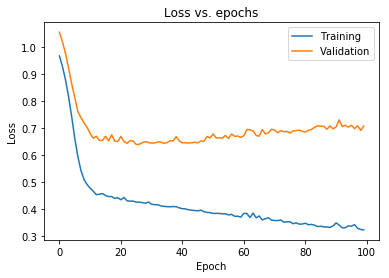

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [8]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [9]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation = 'relu', input_shape = (train_data.shape[1], ), kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(64, activation='relu', kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(16, activation='relu', kernel_regularizer = regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [15]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(wd = 1e-5, rate = 0.3)


In [16]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])


In [17]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs = 100, 
                           validation_split = 0.15, batch_size = 64, verbose = 2)


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 0.9692 - mae: 0.8462 - val_loss: 1.0494 - val_mae: 0.8506
Epoch 2/100
337/337 - 0s - loss: 0.9249 - mae: 0.8251 - val_loss: 1.0103 - val_mae: 0.8305
Epoch 3/100
337/337 - 0s - loss: 0.8766 - mae: 0.8025 - val_loss: 0.9620 - val_mae: 0.8093
Epoch 4/100
337/337 - 0s - loss: 0.8114 - mae: 0.7709 - val_loss: 0.9024 - val_mae: 0.7847
Epoch 5/100
337/337 - 0s - loss: 0.7532 - mae: 0.7475 - val_loss: 0.8460 - val_mae: 0.7629
Epoch 6/100
337/337 - 0s - loss: 0.6763 - mae: 0.6997 - val_loss: 0.7999 - val_mae: 0.7433
Epoch 7/100
337/337 - 0s - loss: 0.6306 - mae: 0.6767 - val_loss: 0.7666 - val_mae: 0.7279
Epoch 8/100
337/337 - 0s - loss: 0.6349 - mae: 0.6699 - val_loss: 0.7558 - val_mae: 0.7104
Epoch 9/100
337/337 - 0s - loss: 0.6022 - mae: 0.6444 - val_loss: 0.7468 - val_mae: 0.6959
Epoch 10/100
337/337 - 0s - loss: 0.5750 - mae: 0.6114 - val_loss: 0.7219 - val_mae: 0.6890
Epoch 11/100
337/337 - 0s - loss: 0.5846 - m

In [18]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose = 2)


45/1 - 0s - loss: 0.5950 - mae: 0.6008


[0.5838679790496826, 0.60075176]

#### Plot the learning curves

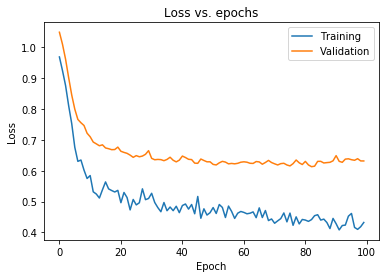

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [20]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs = None):
        print('...... Start training .......')
        
    def on_epoch_begin(self, epoch, logs = None):
        print('Starting epoch ', epoch)
    
    def on_train_batch_begin(self, batch, logs = None):
        print('\t Starting batch ', batch)
    
    def on_train_batch_end(self, batch, logs = None):
        print('\t Finished batch', batch)
        
    def on_epoch_end(self, epoch, logs = None):
        print('Finished epoch')
    
    def on_train_end(self, logs = None):
        print('....... End training ........')


In [22]:
# Re-build the model
model = get_regularised_model(wd = 1e-5, rate = 0.3)


In [23]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])


#### Train the model with the callback

In [25]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs = 2, batch_size = 128, callbacks = [TrainingCallback()])


Train on 397 samples
...... Start training .......
Starting epoch  0
Epoch 1/2
	 Starting batch  0
	 Finished batch 0
128/397 [========>.....................] - ETA: 2s - loss: 0.9201 - mae: 0.8095	 Starting batch  1
	 Finished batch 1
	 Starting batch  2
	 Finished batch 2
	 Starting batch  3
	 Finished batch 3
Finished epoch
397/397 [==============================] - 1s 3ms/sample - loss: 0.9960 - mae: 0.8533
Starting epoch  1
Epoch 2/2
	 Starting batch  0
	 Finished batch 0
128/397 [========>.....................] - ETA: 0s - loss: 0.9978 - mae: 0.8567	 Starting batch  1
	 Finished batch 1
	 Starting batch  2
	 Finished batch 2
	 Starting batch  3
	 Finished batch 3
Finished epoch
397/397 [==============================] - 0s 29us/sample - loss: 0.9816 - mae: 0.8472
....... End training ........


In [28]:
# Evaluate the model
class TestingCallback(Callback):
    
    def on_test_begin(self, logs = None):
        print('........ Start testing ........')
    
    def on_test_batch_begin(self, batch, logs = None):
        print('\t Starting batch')
    
    def on_test_batch_end(self, batch, logs = None):
        print('\t Finished batch')
    
    def on_test_end(self, logs = None):
        print('..... End testing .......')

model.evaluate(test_data, test_targets, verbose = 2, callbacks = [TestingCallback()])        

........ Start testing ........
	 Starting batch
	 Finished batch
	 Starting batch
	 Finished batch
45/1 - 0s - loss: 0.8869 - mae: 0.8245
..... End testing .......


[0.9571111732059054, 0.8245286]

In [30]:
# Make predictions with the model
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs = None):
        print('..... Start prediction ......')
    
    def on_predict_batch_begin(self, batch, logs = None):
        print('\t Starting batch ', batch)
    
    def on_predict_batch_end(self, batch, logs = None):
        print('\t Finishing batch ', batch)
    
    def on_predict_end(self, logs = None):
        print('...... End prediction .......')

model.predict(test_data, callbacks = [PredictionCallback()])        

..... Start prediction ......
	 Starting batch  0
	 Finishing batch  0
	 Starting batch  1
	 Finishing batch  1
...... End prediction .......


array([[ 0.00433877],
       [-0.01777761],
       [ 0.06010732],
       [-0.03390782],
       [-0.02373301],
       [ 0.07767402],
       [-0.00167221],
       [-0.00347514],
       [-0.01407206],
       [ 0.05968182],
       [ 0.0655968 ],
       [-0.03374614],
       [-0.01099645],
       [ 0.04375353],
       [ 0.06103193],
       [-0.02430987],
       [ 0.03179593],
       [ 0.02093973],
       [-0.0256697 ],
       [ 0.00566917],
       [ 0.0284248 ],
       [ 0.07721781],
       [ 0.04418122],
       [ 0.02958088],
       [ 0.01647894],
       [ 0.06688327],
       [-0.03621586],
       [-0.00362249],
       [-0.02287805],
       [ 0.01757196],
       [-0.01498775],
       [-0.02625222],
       [ 0.04791849],
       [-0.02672683],
       [-0.01930223],
       [-0.0087498 ],
       [ 0.01819121],
       [ 0.03932822],
       [-0.01132534],
       [ 0.01338506],
       [ 0.01549018],
       [-0.00234938],
       [-0.02639992],
       [ 0.06876606],
       [-0.0214993 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [18]:
# Re-train the unregularised model
unreg_model = get_model()
unreg_model.compile(optimizer = 'adam', loss = 'mse')
unreg_history = unreg_model.fit(train_data, train_targets, epochs = 100, 
                                   validation_split = 0.15, batch_size = 64, verbose = 2, 
                                   callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10)])


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 0.9050 - val_loss: 1.1058
Epoch 2/100
337/337 - 0s - loss: 0.8623 - val_loss: 1.0284
Epoch 3/100
337/337 - 0s - loss: 0.8173 - val_loss: 0.9367
Epoch 4/100
337/337 - 0s - loss: 0.7705 - val_loss: 0.8415
Epoch 5/100
337/337 - 0s - loss: 0.7088 - val_loss: 0.7784
Epoch 6/100
337/337 - 0s - loss: 0.6464 - val_loss: 0.6501
Epoch 7/100
337/337 - 0s - loss: 0.5891 - val_loss: 0.5581
Epoch 8/100
337/337 - 0s - loss: 0.5382 - val_loss: 0.5133
Epoch 9/100
337/337 - 0s - loss: 0.5154 - val_loss: 0.4387
Epoch 10/100
337/337 - 0s - loss: 0.4973 - val_loss: 0.4634
Epoch 11/100
337/337 - 0s - loss: 0.4943 - val_loss: 0.4223
Epoch 12/100
337/337 - 0s - loss: 0.4837 - val_loss: 0.3816
Epoch 13/100
337/337 - 0s - loss: 0.4837 - val_loss: 0.3940
Epoch 14/100
337/337 - 0s - loss: 0.4772 - val_loss: 0.4140
Epoch 15/100
337/337 - 0s - loss: 0.4742 - val_loss: 0.3686
Epoch 16/100
337/337 - 0s - loss: 0.4736 - val_loss: 0.4248
Epoc

In [19]:
# Evaluate the model on the test set
unreg_model.evaluate(test_data, test_targets, batch_size = 64, verbose = 2)


45/1 - 0s - loss: 0.5357


0.5357096195220947

In [20]:
# Re-train the regularised model
reg_model = get_regularised_model(wd = 1e-6, rate = 0.3)
reg_model.compile(optimizer = 'adam', loss = 'mse')
reg_history = reg_model.fit(train_data, train_targets, epochs = 100, 
                               validation_split = 0.15, batch_size = 64, verbose = 2,
                               callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10)])

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 0.9084 - val_loss: 1.1510
Epoch 2/100
337/337 - 0s - loss: 0.8899 - val_loss: 1.1146
Epoch 3/100
337/337 - 0s - loss: 0.8627 - val_loss: 1.0709
Epoch 4/100
337/337 - 0s - loss: 0.8310 - val_loss: 1.0123
Epoch 5/100
337/337 - 0s - loss: 0.7949 - val_loss: 0.9539
Epoch 6/100
337/337 - 0s - loss: 0.7690 - val_loss: 0.8889
Epoch 7/100
337/337 - 0s - loss: 0.7030 - val_loss: 0.8122
Epoch 8/100
337/337 - 0s - loss: 0.6849 - val_loss: 0.7283
Epoch 9/100
337/337 - 0s - loss: 0.6354 - val_loss: 0.6506
Epoch 10/100
337/337 - 0s - loss: 0.6218 - val_loss: 0.6063
Epoch 11/100
337/337 - 0s - loss: 0.6177 - val_loss: 0.6051
Epoch 12/100
337/337 - 0s - loss: 0.5852 - val_loss: 0.5656
Epoch 13/100
337/337 - 0s - loss: 0.6061 - val_loss: 0.5045
Epoch 14/100
337/337 - 0s - loss: 0.5816 - val_loss: 0.4931
Epoch 15/100
337/337 - 0s - loss: 0.5887 - val_loss: 0.5231
Epoch 16/100
337/337 - 0s - loss: 0.5616 - val_loss: 0.4874
Epoc

In [21]:
# Evaluate the model on the test set
reg_model.evaluate(test_data, test_targets, batch_size = 64, verbose = 2)


45/1 - 0s - loss: 0.5728


0.572799026966095

#### Plot the learning curves

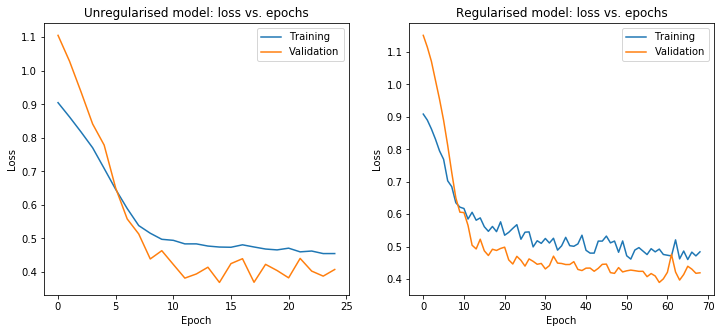

In [22]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()